## EDA


### Import Libraries & Load Data

In [1]:
# Import essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# Display first few rows
df.head()

,patient_id,appointment_id,appointment_date,scheduled_date,no_show,age,gender,zip_code,disease_type,doctor_id,...,claim_date,covid_test_result,covid_test_date,medical_test_type,test_result_value,satisfaction_score,readmitted_within_30_days,doctor_rating,hospital_name,state
0,PID0001,AID0001,2025-07-06,2025-06-08,No,4,Other,53263,Diabetes,DID008,...,2025-07-28,Negative,2025-07-22,Ultrasound,6.62,1,Yes,2,Hospital 9,West Bengal
1,PID0002,AID0002,2025-07-16,2025-06-29,Yes,26,Other,40876,Cancer,DID023,...,2025-07-24,Negative,2025-07-07,MRI,10.62,6,No,2,Hospital 6,Maharashtra
2,PID0003,AID0003,2025-07-22,2025-07-13,Yes,13,Female,40474,Diabetes,DID020,...,2025-08-01,Negative,2025-07-07,Blood Test,8.50,10,No,3,Hospital 10,Tamil Nadu
3,PID0004,AID0004,2025-07-13,2025-07-05,No,6,Other,13434,Flu,DID025,...,2025-07-10,Negative,2025-06-28,X-ray,2.86,6,No,3,Hospital 2,West Bengal
4,PID0005,AID0005,2025-08-07,2025-07-05,No,69,Other,8551,Flu,DID006,...,2025-07-24,Negative,2025-06-04,Blood Test,3.82,1,No,4,Hospital 5,Maharashtra


### Basic Info and Shape

In [2]:
# Shape of dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Column info
df.info()

Dataset has 500 rows and 26 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 500 non-null    object 
 1   appointment_id             500 non-null    object 
 2   appointment_date           500 non-null    object 
 3   scheduled_date             500 non-null    object 
 4   no_show                    500 non-null    object 
 5   age                        500 non-null    int64  
 6   gender                     500 non-null    object 
 7   zip_code                   500 non-null    int64  
 8   disease_type               500 non-null    object 
 9   doctor_id                  500 non-null    object 
 10  doctor_specialty           500 non-null    object 
 11  length_of_stay             500 non-null    int64  
 12  bed_id                     500 non-null    object 
 13  bed_ward     

### Summary Statistics

In [3]:
# Summary stats for numeric columns
df.describe()

,age,zip_code,length_of_stay,claim_amount,test_result_value,satisfaction_score,doctor_rating
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,45.248000,51456.106000,8.058000,24250.092940,7.539540,5.816000,3.002000
std,25.777421,29557.282814,4.367698,14279.251688,4.156987,2.730027,1.404971
min,1.000000,582.000000,1.000000,1009.590000,0.510000,1.000000,1.000000
25%,22.000000,25215.750000,4.000000,10837.427500,3.950000,4.000000,2.000000
50%,45.000000,52633.500000,8.000000,23463.180000,7.465000,6.000000,3.000000
75%,68.000000,76400.250000,12.000000,35939.172500,10.995000,8.000000,4.000000
max,90.000000,99941.000000,15.000000,49937.440000,14.960000,10.000000,5.000000


### Missing Values Check

In [4]:
# Check for missing values
df.isnull().sum()

patient_id                   0
appointment_id               0
appointment_date             0
scheduled_date               0
no_show                      0
age                          0
gender                       0
zip_code                     0
disease_type                 0
doctor_id                    0
doctor_specialty             0
length_of_stay               0
bed_id                       0
bed_ward                     0
insurance_status             0
claim_amount                 0
claim_date                   0
covid_test_result            0
covid_test_date              0
medical_test_type            0
test_result_value            0
satisfaction_score           0
readmitted_within_30_days    0
doctor_rating                0
hospital_name                0
state                        0
dtype: int64

### Unique Values in Key Columns

In [5]:
# Check unique values in some columns
cols_to_check = [
    "no_show",
    "gender",
    "disease_type",
    "insurance_status",
    "covid_test_result",
]
for col in cols_to_check:
    print(f"\n{col} unique values:\n", df[col].value_counts())


no_show unique values:
 no_show
No     392
Yes    108
Name: count, dtype: int64

gender unique values:
 gender
Other     175
Female    175
Male      150
Name: count, dtype: int64

disease_type unique values:
 disease_type
Asthma          93
Cancer          90
Hypertension    83
Diabetes        82
COVID-19        79
Flu             73
Name: count, dtype: int64

insurance_status unique values:
 insurance_status
Public       180
Uninsured    161
Private      159
Name: count, dtype: int64

covid_test_result unique values:
 covid_test_result
Negative    445
Positive     55
Name: count, dtype: int64


### Plot Distribution of Target Columns

Plot saved to: ../visuals/plots/no_show_distribution.png


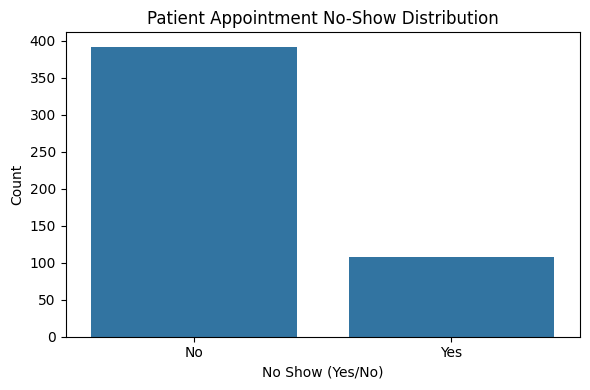

In [7]:
import os

# Create the folder path if it doesn't exist
os.makedirs("../visuals/plots", exist_ok=True)

# Plot and save
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="no_show")
plt.title("Patient Appointment No-Show Distribution")
plt.xlabel("No Show (Yes/No)")
plt.ylabel("Count")
plt.tight_layout()

# Save the plot
plot_path = "../visuals/plots/no_show_distribution.png"
plt.savefig(plot_path)
print(f"Plot saved to: {plot_path}")

plt.show()

In [ ]:
visuals / plots / no_show_distribution.png